# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

---



自然言語100本ノック　https://nlp100.github.io/ja/　\
解答解説　https://kakedashi-engineer.appspot.com/nlp100/



---

# 60. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [ ]:
!pip3 install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
import gdown
gdown.download(
    f"https://drive.google.com/uc?export=download&confirm=pbef&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM",
    output= 'GoogleNews-vectors-negative300.bin.gz',quiet=False
)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:20<00:00, 80.3MB/s]


'GoogleNews-vectors-negative300.bin.gz'

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)



---


# 61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ．

In [ ]:
model.similarity('United_States', 'U.S.')

0.73107743



---


# 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ

In [ ]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]



---


# 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
vec = model['Spain'] - model['madrid'] + model['Athens']
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]



---


# 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2023-12-22 02:37:20--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.188.207, 64.233.189.207, 108.177.97.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.188.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  1.48MB/s    in 0.4s    

2023-12-22 02:37:21 (1.48 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
!head -10 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [ ]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2:
  for line in f1:  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
    line = line.split()
    if line[0] == ':':
      category = line[1]
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))
!head -10 questions-words-add.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.635187029838562
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235778570175171
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622716903687
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527808547019958
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460990905761719
capital-common-countries Athens Greece Helsinki Finland Finland 0.68999844789505




---


# 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
with open('./questions-words-add.txt', 'r') as f:
  sem_cnt = 0
  sem_cor = 0
  syn_cnt = 0
  syn_cor = 0
  for line in f:
    line = line.split()
    if not line[0].startswith('gram'):
      sem_cnt += 1
      if line[4] == line[5]:
        sem_cor += 1
    else:
      syn_cnt += 1
      if line[4] == line[5]:
        syn_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}')

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740




---


# 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [ ]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2023-12-22 04:40:36--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 173.236.137.139
Connecting to www.gabrilovich.com (www.gabrilovich.com)|173.236.137.139|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2023-12-22 04:40:36--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 173.236.137.139
Connecting to gabrilovich.com (gabrilovich.com)|173.236.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K   122KB/s    in 0.2s    

2023-12-22 04:40:37 (122 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv           

In [ ]:
ws353 = []
with open('./combined.csv', 'r') as f:
  next(f)
  for line in f:  # 1行ずつ読込み、単語ベクトルと類似度を計算
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    ws353.append(line)

for i in range(5):
  print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [ ]:
import numpy as np
from scipy.stats import spearmanr

# スピアマン相関係数の計算
human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.685




---


#67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

「k-means 可視化」で調べるとわかりやすい

In [ ]:
# 国名の取得
countries = set()
with open('./questions-words-add.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

In [ ]:
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster 0
Poland, Azerbaijan, Romania, Macedonia, Turkey, Turkmenistan, Uzbekistan, Croatia, Estonia, Moldova, Kazakhstan, Armenia, Albania, Serbia, Montenegro, Slovakia, Cyprus, Latvia, Hungary, Georgia, Lithuania, Slovenia, Tajikistan, Kyrgyzstan, Russia, Belarus, Bulgaria, Ukraine
cluster 1
Israel, Taiwan, Indonesia, Afghanistan, Thailand, Vietnam, Syria, Iraq, Cambodia, Egypt, Laos, Nepal, China, Qatar, Korea, Bhutan, Malaysia, Bangladesh, Jordan, Iran, Pakistan, Oman, Libya, India, Lebanon, Bahrain
cluster 2
Tunisia, Gambia, Senegal, Botswana, Liberia, Zambia, Mozambique, Eritrea, Kenya, Madagascar, Algeria, Uganda, Namibia, Niger, Mali, Somalia, Guinea, Burundi, Zimbabwe, Angola, Malawi, Mauritania, Rwanda, Ghana, Gabon, Sudan, Nigeria
cluster 3
Uruguay, Argentina, Guyana, Tuvalu, Dominica, Ecuador, Bahamas, Venezuela, Jamaica, Chile, Philippines, Fiji, Suriname, Belize, Samoa, Honduras, Nicaragua, Cuba, Mexico, Brazil, Colombia, Peru
cluster 4
Sweden, Denmark, Finland, France, G



---


# 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

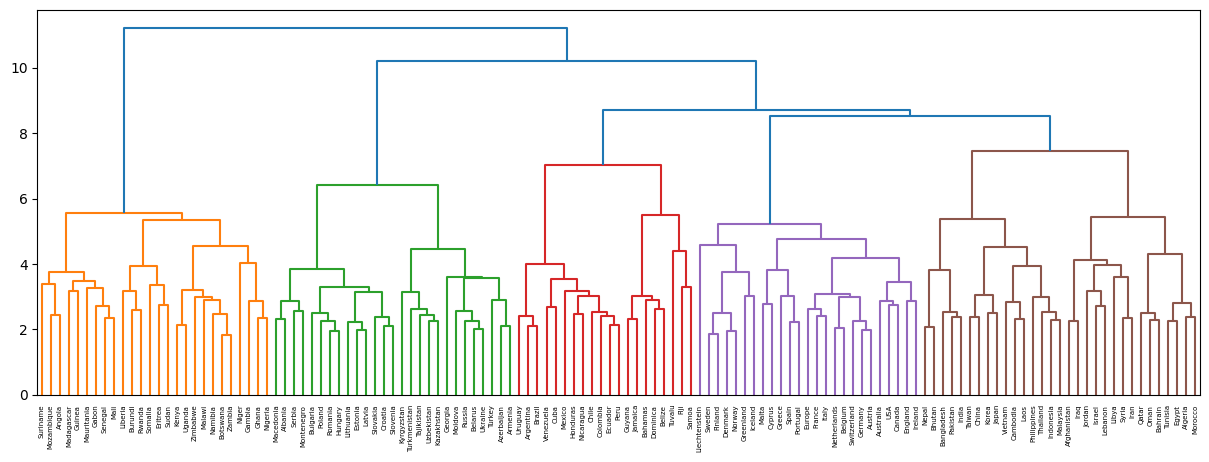

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()



---


# 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

t-SNEは可視化の手段でしかない。200次元とか300次元のものを2次元にまとめている。

In [ ]:
!pip install bhtsne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp310-cp310-linux_x86_64.whl size=273552 sha256=0e6aa41392b1036e0af6674a4e8591d0fb5f3f5198439b1bc7a4c2f035d88867
  Stored in directory: /root/.cache/pip/wheels/24/4f/44/5397f84b9a0b2bdc20824d60f71a9349883785afda348b27db
Successfully built bhtsne


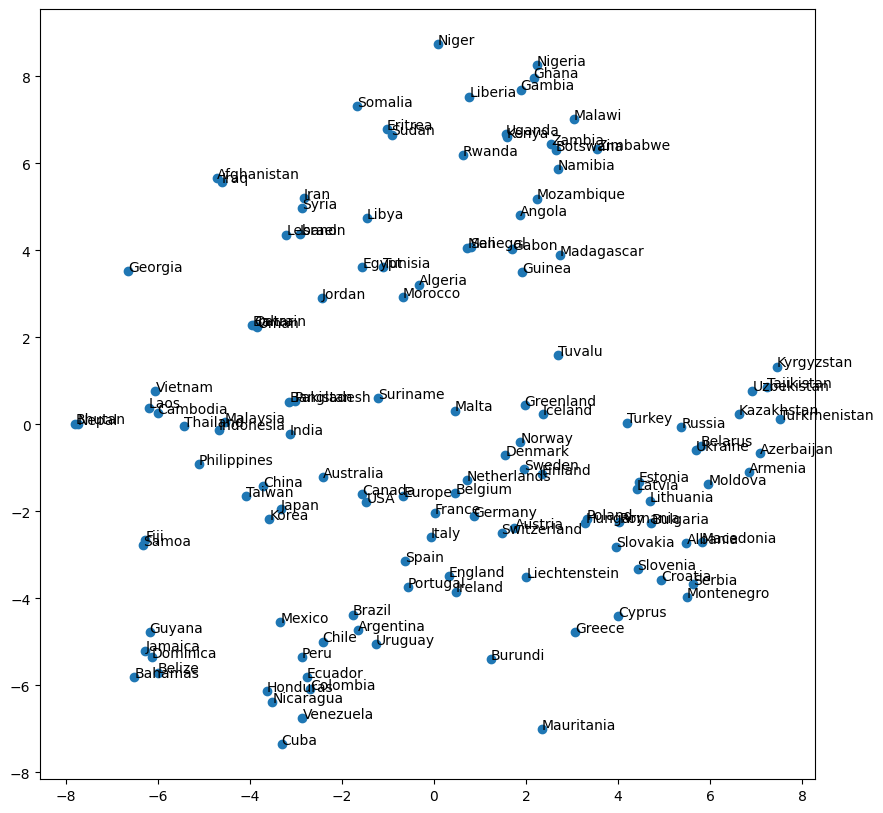

In [ ]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()